# EDA *Assignment*

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import os

base_path = "/content/drive/MyDrive/ds_krishna"

os.makedirs(os.path.join(base_path, "csv_files"), exist_ok=True)
os.makedirs(os.path.join(base_path, "outputs"), exist_ok=True)


In [70]:
import shutil

shutil.move(
    "/content/fear_greed_index.csv",
    "/content/drive/MyDrive/ds_krishna/csv_files/fear_greed_index.csv"
)

shutil.move(
    "/content/historical_data.csv",
    "/content/drive/MyDrive/ds_krishna/csv_files/historical_data.csv"
)


'/content/drive/MyDrive/ds_krishna/csv_files/historical_data.csv'

In [71]:
import pandas as pd

fear_greed_df = pd.read_csv(
    "/content/drive/MyDrive/ds_krishna/csv_files/fear_greed_index.csv"
)

trader_df = pd.read_csv(
    "/content/drive/MyDrive/ds_krishna/csv_files/historical_data.csv"
)


Objective

The goal of this analysis is to study how trader behavior changes under different market sentiment conditions (Fear vs Greed). By combining trader-level data with market sentiment data, we aim to identify patterns in profitability, risk-taking, and trading activity.

STEP 1) I first check the structure and data types to understand available features and identify any missing or inconsistent values.

In [72]:
fear_greed_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [73]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [74]:
print(trader_df.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [75]:
print(fear_greed_df.columns)


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [76]:
fear_greed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [77]:
trader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

STEP 2) Since both datasets are time-based, I'm standardizing the date format so that they can be merged correctly.

In [78]:
trader_df['Timestamp'] = pd.to_datetime(
    trader_df['Timestamp'],
    unit='s',
    errors='coerce'
)

In [79]:
trader_df['Timestamp'].head()

,Timestamp
0,NaT
1,NaT
2,NaT
3,NaT
4,NaT


In [80]:
trader_df['Timestamp'] = pd.to_datetime(
    trader_df['Timestamp'],
    unit='ms',
    errors='coerce'
)
trader_df['date'] = trader_df['Timestamp'].dt.date

trader_df['date'].min(), trader_df['date'].max()

(NaT, NaT)

In [81]:
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])
fear_greed_df['date'] = fear_greed_df['date'].dt.date


STEP 3) I merge trader data with sentiment data using the date field to associate each trade with the corresponding market sentiment.

In [82]:
trader_df = pd.read_csv(
    "/content/drive/MyDrive/ds_krishna/csv_files/historical_data.csv"
)


In [83]:
trader_df['Timestamp'].head()

,Timestamp
0,1.730000e+12
1,1.730000e+12
2,1.730000e+12
3,1.730000e+12
4,1.730000e+12


In [84]:
trader_df['Timestamp'].dtype

dtype('float64')

In [85]:
trader_df['Timestamp'] = pd.to_datetime(
    trader_df['Timestamp'],
    unit='ms',
    errors='coerce'
)


In [86]:
trader_df['date'] = trader_df['Timestamp'].dt.date

In [87]:
trader_df['Timestamp'].head()

,Timestamp
0,2024-10-27 03:33:20
1,2024-10-27 03:33:20
2,2024-10-27 03:33:20
3,2024-10-27 03:33:20
4,2024-10-27 03:33:20


In [88]:
trader_df['date'].min(), trader_df['date'].max()

(datetime.date(2023, 3, 28), datetime.date(2025, 6, 15))

In [89]:
merged_df = trader_df.merge(
    fear_greed_df[['date', 'classification']],
    on='date',
    how='inner'
)

In [90]:
merged_df['classification'].value_counts()

,count
classification,
Fear,133871
Greed,36289
Neutral,7141
Extreme Greed,6962


In [91]:
#Trade volume is calculated using the absolute USD value of each trade to ensure consistency across different coins and positions.
merged_df['trade_volume'] = merged_df['Size USD'].abs()

In [92]:
#quick sanity checks
merged_df[['Size USD', 'trade_volume']].head()

,Size USD,trade_volume
0,7872.16,7872.16
1,127.68,127.68
2,1150.63,1150.63
3,1142.04,1142.04
4,69.75,69.75


In [93]:
merged_df['classification'].isna().sum(), len(merged_df)

(np.int64(0), 184263)

# Chapter 1


CORE ANALYSIS

step 1) Simplify sentiment. this is the first step here in the analysis

In [94]:
merged_df['sentiment'] = merged_df['classification'].replace({
    'Extreme Fear': 'Fear',
    'Extreme Greed': 'Greed'
})


step 2) Profitability vs Sentimen

In [95]:
merged_df.groupby('sentiment')['Closed PnL'].mean()

,Closed PnL
sentiment,
Fear,50.047622
Greed,77.838247
Neutral,22.229713


step 3) Trade Volume vs Sentiment

In [96]:
merged_df['trade_volume'] = merged_df['Size USD'].abs()

In [97]:
merged_df.groupby('sentiment')['trade_volume'].mean()

,trade_volume
sentiment,
Fear,5259.977837
Greed,3581.661513
Neutral,3058.848110


# Result
Average trade size is highest during fear periods, indicating that traders tend to place larger-value trades when market sentiment is negative.

In [98]:
merged_df.groupby(['sentiment', 'Side']).size().unstack()

Side,BUY,SELL
sentiment,,
Fear,66081,67790
Greed,18792,24459
Neutral,3505,3636


#Result
Average trade size is highest during fear periods, indicating that traders tend to place larger-value trades when market sentiment is negative.

#chapter 2

The Visual Representaion

In [99]:
# dedicated folder called output for storing the images of analysis
import os

output_dir = "/content/drive/MyDrive/ds_krishna/outputs"
os.makedirs(output_dir, exist_ok=True)


Plot 1: Sentiment Distribution

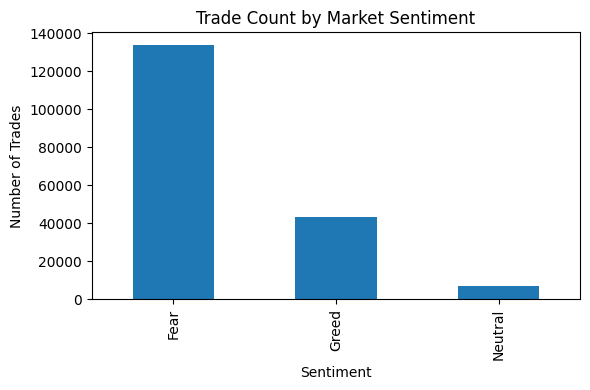

In [100]:
import matplotlib.pyplot as plt

sentiment_counts = merged_df['sentiment'].value_counts()

plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar')
plt.title("Trade Count by Market Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Trades")
plt.tight_layout()

plt.savefig(f"{output_dir}/sentiment_distribution.png")
plt.show()

Plot 2: Average Trade Volume vs Sentiment

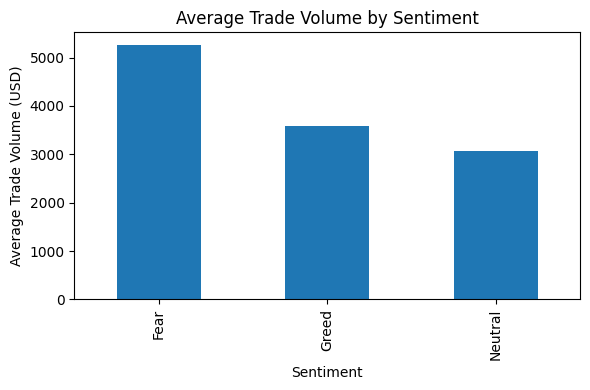

In [101]:
avg_volume = merged_df.groupby('sentiment')['trade_volume'].mean()

plt.figure(figsize=(6,4))
avg_volume.plot(kind='bar')
plt.title("Average Trade Volume by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Trade Volume (USD)")
plt.tight_layout()

plt.savefig(f"{output_dir}/avg_trade_volume_by_sentiment.png")
plt.show()

Plot 3: Buy vs Sell Behavior

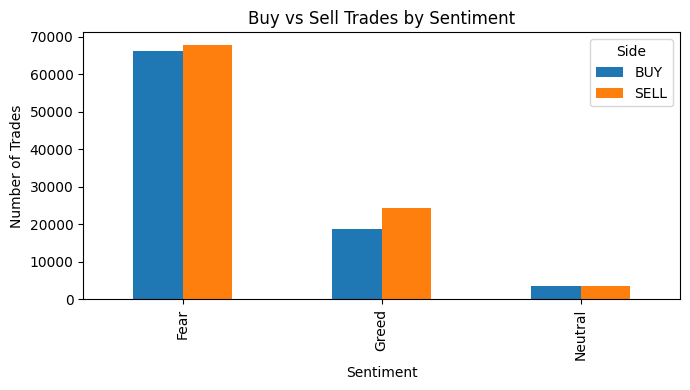

In [102]:
side_counts = merged_df.groupby(['sentiment', 'Side']).size().unstack()

side_counts.plot(kind='bar', figsize=(7,4))
plt.title("Buy vs Sell Trades by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Trades")
plt.legend(title="Side")
plt.tight_layout()

plt.savefig(f"{output_dir}/buy_sell_by_sentiment.png")
plt.show()